# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

Here are the datasets that will be used in this project [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip) and [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).

In [33]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("data/lfw/*/*"))
dog_files = np.array(glob("data/dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


### Detecting humans faces

Number of faces detected: 1


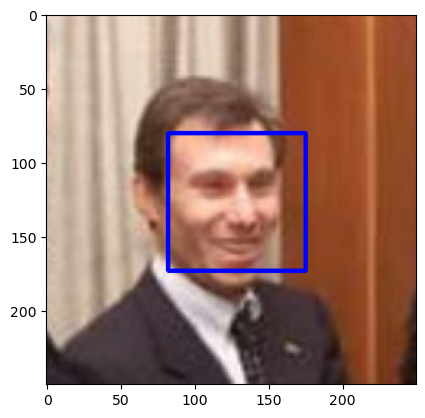

In [34]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [35]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [36]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

numOfHumans = 0
numOfDogs = 0
for human in(human_files_short):
    if face_detector(human):
        numOfHumans += 1
        
for dog in(dog_files_short):
    if face_detector(dog):
        numOfDogs += 1
        
print("Percentage for Human image detecation is: "+str(numOfHumans)+ "%")
print("Percentage for Dog image detecation is:"+str(numOfDogs)+ "%")

Percentage for Human image detecation is: 99%
Percentage for Dog image detecation is:18%


# Dog dectection  model

### Obtain Pre-trained VGG-16 Model


In [42]:
import torch
import torchvision.models as models
device = torch.device('mps')
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
#move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
#check the vvg16 model layers and feature
VGG16



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [43]:
from PIL import Image
import torchvision.transforms as transforms
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    image = Image.open(img_path).convert('RGB')

    transform = transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop((224, 224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406),
                                                          (0.229, 0.224, 0.225))])
    image = transform(image)[:3,:,:].unsqueeze(0)
    output = VGG16(image)
    
    # convert output probabilities to predicted class
    _, predictedClass = torch.max(output, 1) # return the max value in the tensor 
    
    return predictedClass.item()

In [44]:
def dog_detector(img_path):
    dogPred = VGG16_predict(img_path)
    return ((dogPred >= 151) & (dogPred <=268)) 

## Testing the pre-trained model 
Found out that the model did pretty good job in detection of dogs and for human it had only 0 percent detection for dogs

In [45]:
numOfHumans = 0
numOfDogs = 0
for human in(human_files_short):
    if dog_detector(human):
        numOfHumans += 1
        
for dog in(dog_files_short): 
    if dog_detector(dog):
        numOfDogs += 1
        
print("Percentage for Human image detecation is: "+str(numOfHumans)+ "%")
print("Percentage for Dog image detecation is:"+str(numOfDogs)+ "%")


Percentage for Human image detecation is: 0%
Percentage for Dog image detecation is:97%


### Exploring more pre-trained models

In [30]:
import torch
import torchvision.models as models

# define VGG16 model
VGG19 = models.vgg19(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG19 = VGG19.cuda()
    
#check the vvg16 model layers and feature
VGG19



/Users/adam/opt/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /Users/adam/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [31]:
from PIL import Image
import torchvision.transforms as transforms
def VGG19_predict(img_path):
    '''
    Use pre-trained VGG-19 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    image = Image.open(img_path).convert('RGB')

    transform = transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop((224, 224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406),
                                                          (0.229, 0.224, 0.225))])
    image = transform(image)[:3,:,:].unsqueeze(0)
    output = VGG19(image)
    
    # convert output probabilities to predicted class
    _, predictedClass = torch.max(output, 1) # return the max value in the tensor 
    
    return predictedClass.item()
def dog_detector(img_path):
    dogPred = VGG19_predict(img_path)
    return ((dogPred >= 151) & (dogPred <=268)) 


In [32]:
numOfHumans = 0
numOfDogs = 0
for human in(human_files_short):
    if dog_detector(human):
        numOfHumans += 1
        
for dog in(dog_files_short): 
    if dog_detector(dog):
        numOfDogs += 1
        
print("Percentage for Human image detecation is: "+str(numOfHumans)+ "%")
print("Percentage for Dog image detecation is:"+str(numOfDogs)+ "%")


Percentage for Human image detecation is: 0%
Percentage for Dog image detecation is:97%


### Trying the Alexnet model 

It appears that the vgg model did better than alexnet

In [42]:
alexnet = models.alexnet(pretrained=True)

# define VGG16 model
alexnet = models.alexnet(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    alexnet = alexnet.cuda()
    
#check the vvg16 model layers and feature
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [38]:
def dog_detector(img_path):
    dogPred = alexnet_predict(img_path)
    return ((dogPred >= 151) & (dogPred <=268)) 


In [37]:
def alexnet_predict(img_path):
    '''
    Use pre-trained alexnet model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    image = Image.open(img_path).convert('RGB')

    transform = transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop((224, 224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406),
                                                          (0.229, 0.224, 0.225))])
    image = transform(image)[:3,:,:].unsqueeze(0)
    output = alexnet(image)
    
    # convert output probabilities to predicted class
    _, predictedClass = torch.max(output, 1) # return the max value in the tensor 
    
    return predictedClass.item()

In [39]:
numOfHumans = 0
numOfDogs = 0
for human in(human_files_short):
    if dog_detector(human):
        numOfHumans += 1
        
for dog in(dog_files_short): 
    if dog_detector(dog):
        numOfDogs += 1
        
print("Percentage for Human image detecation is: "+str(numOfHumans)+ "%")
print("Percentage for Dog image detecation is:"+str(numOfDogs)+ "%")


Percentage for Human image detecation is: 1%
Percentage for Dog image detecation is:97%


In [22]:
import torch
import math
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

device = torch.device("mps")

# checking for using the gpu on mac m1


True
True


# Building My Own Neural Network Model

## After exploring some pre-trained models, I would like to try have better results compared to the pre-trained models

In [54]:
from torchvision import datasets
from torchvision import transforms



# how many samples per batch to load

batch_size = 16

transform = transforms.Compose([transforms.Resize(size=224),
                                transforms.CenterCrop((224,224)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(30),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


trainDir = 'data/dogImages/train'
validDir = 'data/dogImages/valid'
testDir = 'data/dogImages/test'

trainset = datasets.ImageFolder(trainDir, transform = transform)
validset = datasets.ImageFolder(validDir, transform = transform)
testset = datasets.ImageFolder(testDir, transform = transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(validset,batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)
loaders_scratch = dict(train=train_loader, test=test_loader, valid=valid_loader)


In [55]:
import torch.nn as nn 
import torch.nn.functional as F 

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        self.pool =  nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(64 * 28 * 28, 500)
        self.fc2 = nn.Linear(500, 133)
        
        self.dropout = nn.Dropout(0.2)
        self.batch_norm = nn.BatchNorm1d(num_features=500)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout(x)
        
        x = x.view(x.size(0), -1)
        x = F.relu(self.batch_norm(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [56]:
model_scratch = Net()
if use_cuda:
    model_scratch.cuda()

In [57]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.01)

## Train and validate the Model

In [58]:


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss
    # return trained model
    return model




                
                

In [59]:
# train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


model_scratch.load_state_dict(torch.load('model_scratch.pt'))


KeyboardInterrupt: 

# Testing the model 

In [60]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.973004


Test Accuracy:  1% (15/836)


## Trying CNN with transfer learning 

In [62]:
loaders_transfer = loaders_scratch

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True) # Using Vgg16 since it gave us before better results than other models
print(model_transfer)

# freeze all VGG parameters since we're only optimizing the target image
for param in model_transfer.features.parameters():
    param.requires_grad_(False)
    
inf = model_transfer.classifier[6].in_features # Last layer
model_transfer.classifier[6] = nn.Linear(inf, 133)
    
if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [64]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.SGD(model_transfer.classifier.parameters(), lr=0.01)



In [ ]:
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


In [ ]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

In [ ]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in trainset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    transform = transforms.Compose([transforms.Resize(size=224),
                                transforms.CenterCrop((224,224)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(30),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    img = transform(Image.open(img_path)).unsqueeze(0)
    output = model_transfer(img)
    _, pred = torch.max(output, 1)
    
    return class_names[pred.item()]


In [ ]:
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path):
        print("hello, human!")
        image = Image.open(img_path)
        plt.imshow(image)
        plt.show()
        print("You look like a...")
        print(predict_breed_transfer(img_path))
    elif dog_detector(img_path):
        print("hello, dog!")
        image = Image.open(img_path)
        plt.imshow(image)
        plt.show()
        print("You look like a...")
        print(predict_breed_transfer(img_path))
    else:
        print("Error, can not detect the image")
        image = Image.open(img_path)
        plt.imshow(image)
        plt.show()

In [ ]:
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)